## Solving problems with SGD

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Building a simple function in python

In [2]:
def square(array_in):
    return np.power(array_in, 2)

And applying it to some data and a two parameter model

In [3]:
N_POINTS= 100
x = np.random.uniform(0.0, 100.0, 100)
y = 2 * x - 3 + np.random.normal(0.0, 10.0, 100)

def error(a, b):
    y_pred = a * x + b
    return np.sum(square(y - y_pred))

Gives us a score representing how well the model is doing

In [4]:
error(0.01, 0.4)

1326068.7222399586

And ideally we would like to decrease this score as much as possible

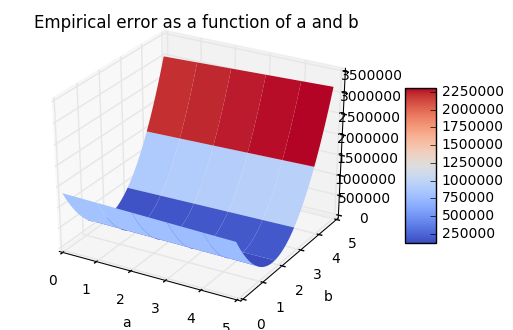

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

a_grid = np.arange(0.0, 5.0, 0.1)
b_grid = np.arange(0.0, 5.0, 0.1)
error_plot = np.asanyarray([[error(a, b) 
                             for b in b_grid]
                            for a in a_grid])
A, B = np.meshgrid(a_grid, b_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')

im = ax.plot_surface(A, B, error_plot, cmap=cm.coolwarm, linewidth=0)

plt.title('Empirical error as a function of a and b')
plt.xlabel('a')
plt.ylabel('b')
fig.colorbar(im, shrink=0.5, aspect=5)
plt.show()

At any point in this 2D space, we can compute the sensitivity of the error with respect to the parameters a and b. This is called the gradient and is defined as the vector (derr / da, derr / db).

Write down the analytical expression for error(a,b) and derive the corresponding gradient:

### YOUR ANSWER HERE

In [ ]:
def error_grad(a, b):
    #
    #  Your code here
    #
    
    #
    #  Answer
    #
    return -2.0 * np.sum((y - (a * x + b)) * x), -2.0 * np.sum((y - (a * x + b)))

In [ ]:
a_grads, b_grads = [], []

for i in xrange(A.shape[0]):
    for j in xrange(A.shape[1]):
        a_grad, b_grad = error_grad(A[i, j], B[i, j])
        a_grads.append(a_grads)
        b_grads.append(b_grads)

a_grads = np.asanyarray(a_grads)
b_grads = np.asanyarray(b_grads)

plt.quiver(A, B, a_grads, b_grads, units='width')
plt.show()